In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

https://github.com/CyberAgentAILab/cmaes

`pip install cmaes`
`conda install -c conda-forge cmaes`

In [2]:
from cmaes import CMA

In [3]:
# project files
import sys; sys.path.insert(0, '..')

from utils.variables import pack, unpack
from utils.display import table, tabulate
from utils.files import download_sheet, save, load
from utils.hash import digest

from model.fit_options import fit_options, RoundApprox
from model.rp import compute_rp, make_precomputed_columns
from model.initial_guess import make_initial_guess

In [4]:
# stuff for display

from IPython.lib.pretty import pretty, pprint

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# progress bar
from tqdm.auto import tqdm

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 120)

In [5]:
data = pd.read_pickle(fit_options.data_file)
data.describe()
data.head()

,Level,RP,MS lvl,ModelRP,Difference,Freq1,FreqL,Inv,Berry1,BerryL,Ing1P,Helps per hour,Helps Neutral,NrgMult,IngrMult,SkillMult,Ingr%,SklContr,BerryD,IngD,Dupes,Amnt,Ing2P,Help skill bonus,RP Multiplier
count,7437.000000,7437.000000,7437.000000,7437.000000,7437.000000,7437.000000,7437.000000,7437.000000,7437.000000,7437.000000,7437.000000,7437.00000,7437.000000,7437.000000,7437.000000,7437.000000,7437.000000,7437.000000,7437.000000,7437.000000,7437.0,7437.000000,7437.000000,7437.000000,7437.000000
mean,11.146027,632.770741,1.529784,630.451930,-0.001882,3913.002555,3757.090833,12.351486,28.067635,38.337098,108.900498,1.03455,0.988115,0.994600,0.999059,1.007395,0.206704,34.544406,56.022993,148.120815,1.0,0.086325,3.564744,0.986569,1.030104
std,7.399255,412.790804,1.020016,413.420686,0.579130,974.376716,1037.810249,3.479696,2.617209,8.309035,16.168568,0.31072,0.058727,0.045032,0.117963,0.118599,0.045998,38.467134,28.106769,61.429161,0.0,0.555497,22.205439,0.039059,0.072454
min,1.000000,245.000000,1.000000,-1.000000,-21.000000,2200.000000,1489.118400,7.000000,24.000000,24.000000,90.000000,0.52000,0.890000,0.920000,0.800000,0.800000,0.000000,0.000000,25.000000,90.000000,1.0,0.000000,0.000000,0.790000,1.000000
25%,5.000000,360.000000,1.000000,359.000000,0.000000,3100.000000,2910.240000,10.000000,26.000000,33.000000,98.000000,0.81000,1.000000,1.000000,1.000000,1.000000,0.180000,13.160000,36.000000,101.000000,1.0,0.000000,0.000000,1.000000,1.000000
50%,10.000000,488.000000,1.000000,486.000000,0.000000,3800.000000,3731.600000,12.000000,28.000000,37.000000,103.000000,0.96000,1.000000,1.000000,1.000000,1.000000,0.200000,20.200000,46.000000,121.000000,1.0,0.000000,0.000000,1.000000,1.000000
75%,14.000000,745.000000,2.000000,743.000000,0.000000,4500.000000,4419.000000,14.000000,31.000000,42.000000,115.000000,1.23000,1.000000,1.000000,1.000000,1.000000,0.230000,47.660000,68.000000,202.000000,1.0,0.000000,0.000000,1.000000,1.000000
max,42.000000,3493.000000,6.000000,3495.000000,5.000000,6300.000000,6916.140000,24.000000,35.000000,83.000000,151.000000,2.41000,1.120000,1.080000,1.200000,1.200000,0.420000,414.090000,243.000000,511.000000,1.0,8.000000,342.000000,1.000000,1.440000


,Pokemon,Level,RP,Nature,MS lvl,Source,ModelRP,Difference,Nature2,ID,NatureP,NatureN,Freq1,FreqL,Type,Class,MSkill,Inv,Berry1,BerryL,Ing1,Ing1P,Helps per hour,Helps Neutral,NrgMult,IngrMult,SkillMult,Ingr%,SklContr,RPneutral,IDNeutral,BerryD,IngD,Dupes,DupeMatch,Sub Skill 1,Sub Skill 2,Ingredient 2,Amnt,Ing2P,Help skill bonus,RP Multiplier
0,Arbok,9.0,574.0,Naughty,1.0,Rate My Mon,574.0,0.0,Naughty,ArbokNaughty91,Speed of Help,Main Skill Chance,3700.0,3276.72,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,1.09,0.9,1.00,1.0,0.8,0.26,22.75,538.35,ArbokNeutral91,80.0,103.0,1,True,,,,0.0,0.0,1.0,1.0
1,Arbok,8.0,531.0,Hardy,1.0,Questions help guides,531.0,0.0,Neutral,ArbokNeutral81,-,-,3700.0,3648.20,Poison,Berries,Charge Energy S,14.0,32.0,39,Bean Sausage,103.0,0.98,1.0,1.00,1.0,1.0,0.26,22.75,531.00,ArbokNeutral81,78.0,103.0,1,True,,,,0.0,0.0,1.0,1.0
2,Arbok,8.0,538.0,Quiet,1.0,Questions help guides,538.0,0.0,Quiet,ArbokQuiet81,Ingredient Finding,Exp Gains,3700.0,3648.20,Poison,Berries,Charge Energy S,14.0,32.0,39,Bean Sausage,103.0,0.98,1.0,1.00,1.2,1.0,0.26,22.75,530.60,ArbokNeutral81,78.0,103.0,1,True,,,,0.0,0.0,1.0,1.0
3,Arbok,9.0,582.0,Relaxed,1.0,,582.0,0.0,Relaxed,ArbokRelaxed91,Energy Recovery,EXP Gains,3700.0,3640.80,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,0.98,1.0,1.08,1.0,1.0,0.26,22.75,538.89,ArbokNeutral91,80.0,103.0,1,True,,,,0.0,0.0,1.0,1.0
4,Arbok,9.0,489.0,Timid,1.0,,489.0,0.0,Timid,ArbokTimid91,EXP Gains,Speed of Help,3700.0,4004.88,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,0.89,1.1,1.00,1.0,1.0,0.26,22.75,538.45,ArbokNeutral91,80.0,103.0,1,True,,,,0.0,0.0,1.0,1.0


In [6]:
# Make an initial guess
# Pack the dictionary into a 1-D vector.
# Also store information on how to unpack that vector

x0, unpack_info = pack(*make_initial_guess())
computed = make_precomputed_columns(data)

In [7]:
# We compute the RP model in rp_model.py
# Here we create closure to glue the pieces together.

def RP(x):
    return compute_rp(x, data, computed, unpack_info)

# for the error analysis page,
# we'll compute the residual with exact rounding.

def residual(x):
    return data["RP"] - np.round(RP(x))


In [8]:
filename = fit_options.result_file(digest(data, x0))
opt = load(filename)
opt

    message: `ftol` termination condition is satisfied.
    success: True
     status: 2
          x: [ 2.564e-01  2.544e-01 ...  2.210e-01  2.211e-01]
       cost: 1161.9338154813295
       grad: [-2.918e-05 -6.763e-06 ...  0.000e+00  0.000e+00]
 optimality: 0.5464297671569511
       nfev: 19
       njev: 7

In [9]:
fit_options.rounding.rp = RoundApprox.Exact
fit_options.rounding.bonus = RoundApprox.Exact
#fit_options.soft_round.alpha = 18

optx = opt.x
choice_list = [0.5*optx, 1.5*optx]
bounds_low =  np.select([optx>=0, optx<0], choice_list)
bounds_high = np.select([optx<0, optx>=0], choice_list)

result = solve(residual, optx, bounds=( bounds_low, bounds_high ), scaling_within_bounds=True, print_progress=True, maxfun=2000)

 Run  Iter     Obj       Grad     Delta      rho     Evals 
  1     1    2.26e+03  8.30e+04  1.00e-01  1.00e-01   250  
  1     2    2.26e+03  8.30e+04  5.00e-02  1.00e-02   250  
  1     3    2.26e+03  8.32e+04  2.50e-02  1.00e-02   252  
  1     4    2.26e+03  8.37e+04  1.00e-02  1.00e-02   254  
  1     5    2.26e+03  8.94e+04  1.00e-02  1.00e-02   256  
  1     6    2.26e+03  8.87e+04  1.00e-02  1.00e-02   258  
  1     7    2.26e+03  8.92e+04  1.00e-02  1.00e-02   260  
  1     8    2.26e+03  1.02e+05  1.00e-02  1.00e-02   262  
  1     9    2.26e+03  1.03e+05  1.00e-02  1.00e-02   264  
  1    10    2.26e+03  1.02e+05  1.00e-02  1.00e-02   266  
  1    11    2.26e+03  1.09e+05  1.00e-02  1.00e-02   268  
  1    12    2.26e+03  1.24e+05  1.00e-02  1.00e-02   270  
  1    13    2.26e+03  1.40e+05  1.00e-02  1.00e-02   272  
  1    14    2.26e+03  1.37e+05  1.00e-02  1.00e-02   274  
  1    15    2.26e+03  1.34e+05  1.00e-02  1.00e-02   276  
  1    16    2.26e+03  1.40e+05  1.00e-0

In [11]:
table(result)

EXIT_FALSE_SUCCESS_WARNING,3
EXIT_INPUT_ERROR,-1
EXIT_LINALG_ERROR,-3
EXIT_MAXFUN_WARNING,1
EXIT_SLOW_WARNING,2
EXIT_SUCCESS,0
EXIT_TR_INCREASE_ERROR,-2
diagnostic_info,None
f,2234.0
flag,0
jacobian,[[-0. 0. -0. ... -0. 0. -0.] [-0. 0. -0. ... -0. 0. -0.] [-0. 0. -0. ... -0. 0. -0.] ... [-0. 0. -0. ... -0. 0. -0.] [-0. 0. -0. ... -0. 0. -0.] [-0. 0. -0. ... -0. 0. -0.]]


count    7437.000000
mean       -0.001345
std         0.548114
min        -5.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        15.000000
Name: RP, dtype: float64

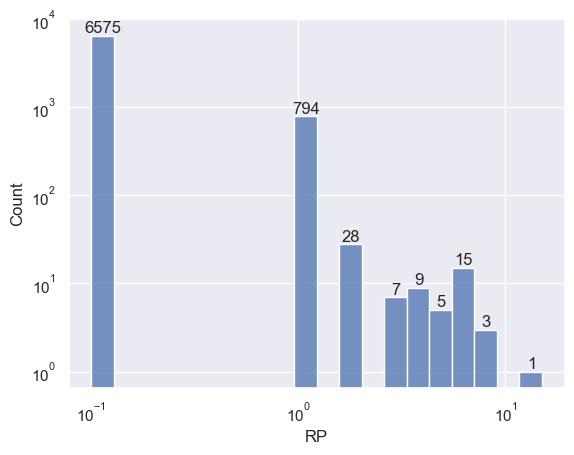

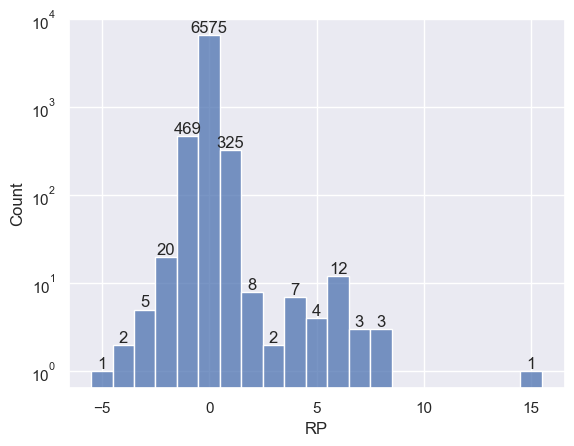

In [12]:
r_opt = data["RP"] - np.round(RP(result.x))
pd.Series(r_opt).describe()

_ = plt.figure()
g = sns.histplot(x=np.clip(np.abs(r_opt), 1e-1,1e3), log_scale=True, bins=20)
g.axes.set_yscale('log')
_ = g.bar_label(g.containers[1], labels= [str(v) if v else '' for v in g.containers[1].datavalues])

_ = plt.figure()
g = sns.histplot(x=r_opt, discrete=1)
_ = g.axes.set_yscale('log')
_ = g.bar_label(g.containers[1], labels= [str(v) if v else '' for v in g.containers[1].datavalues])